(visualizzare_data_frame_notebook)=
# Visualizzazione dei dati

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import matplotlib_inline.backend_inline

In [6]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
plt.style.use('tableau-colorblind10')

In [7]:
df = pd.read_csv("data/penguins.csv")

### Barplot

Quante osservazioni per ciascuna isola?

<AxesSubplot: >

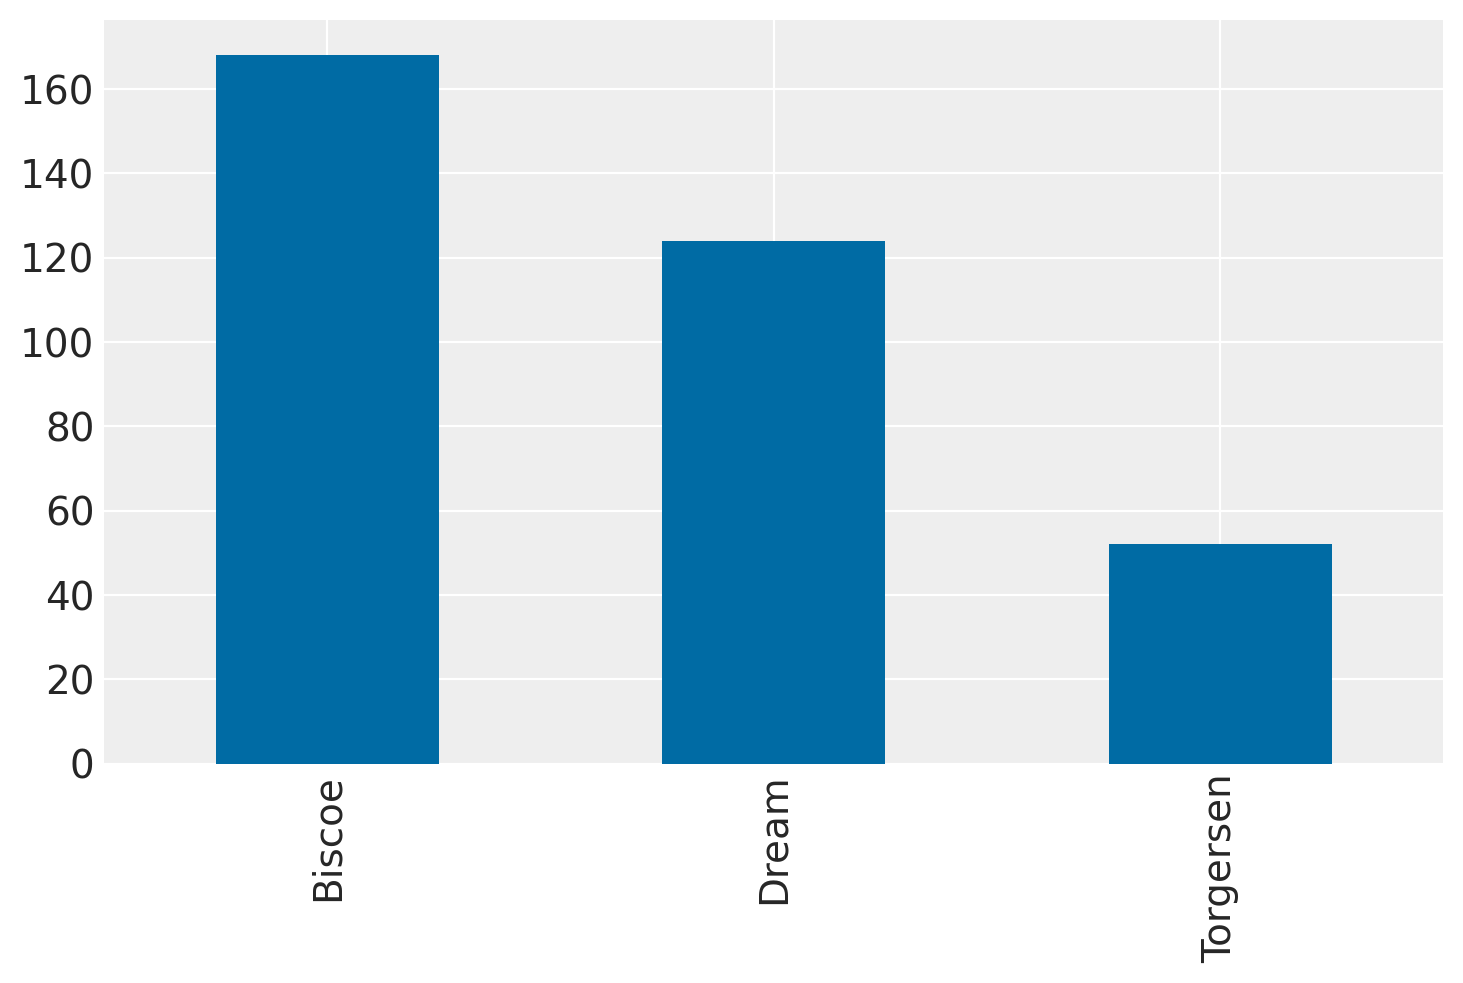

In [8]:
df['island'].value_counts().plot(kind='bar')

Quante osservazioni per ciascuna specie?

<AxesSubplot: >

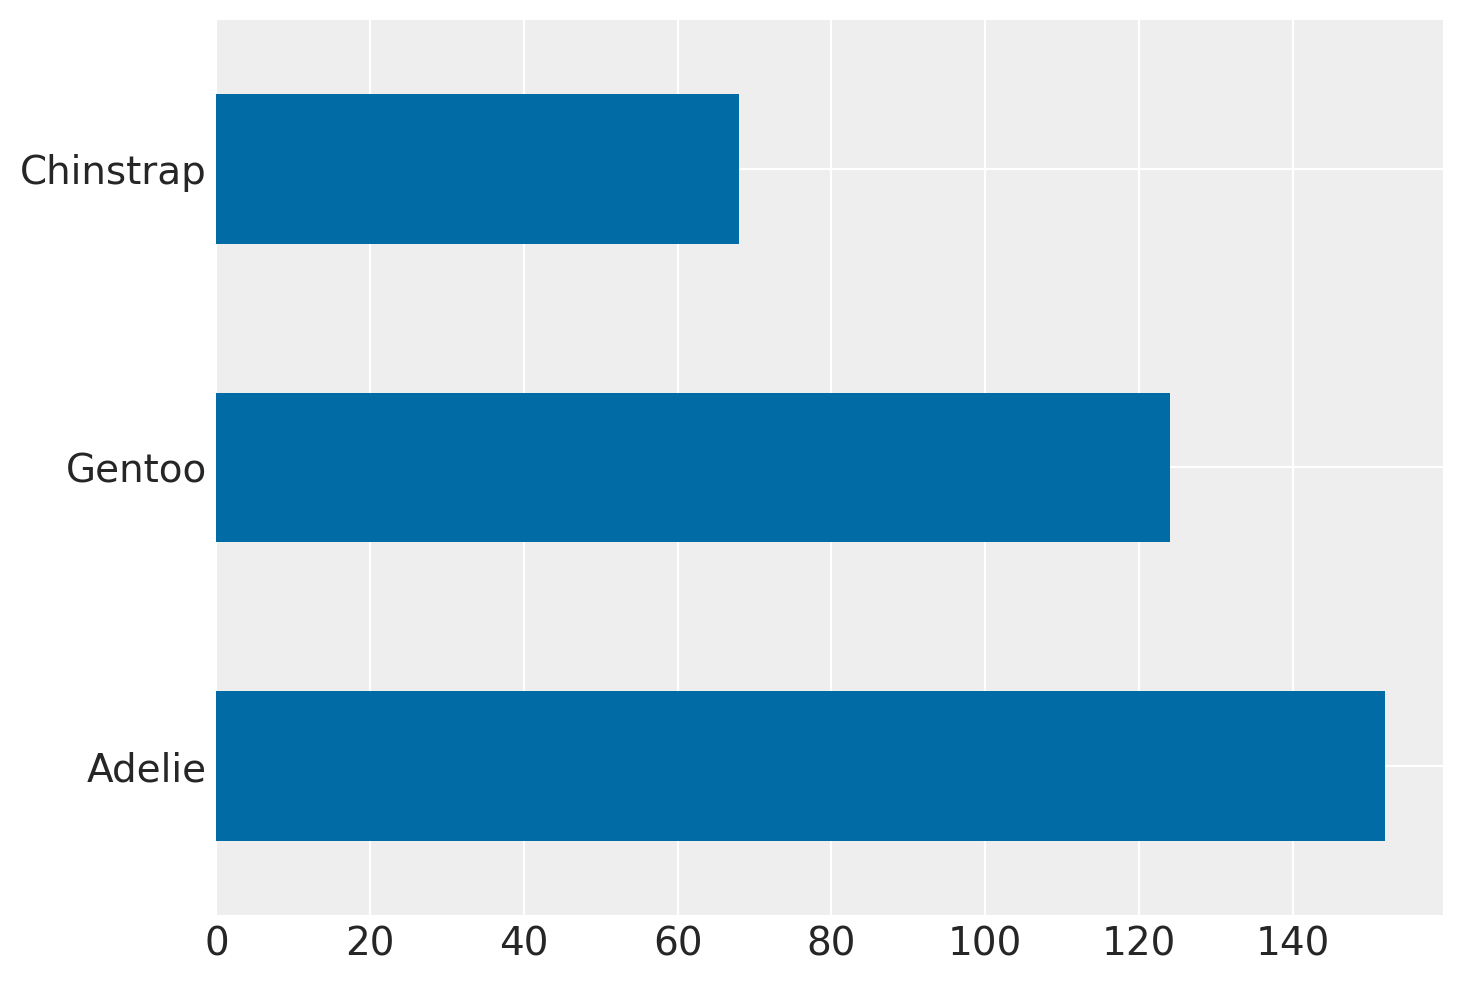

In [9]:
df['species'].value_counts().plot(kind='barh')

### Istrogramma lisciato

<AxesSubplot: ylabel='Density'>

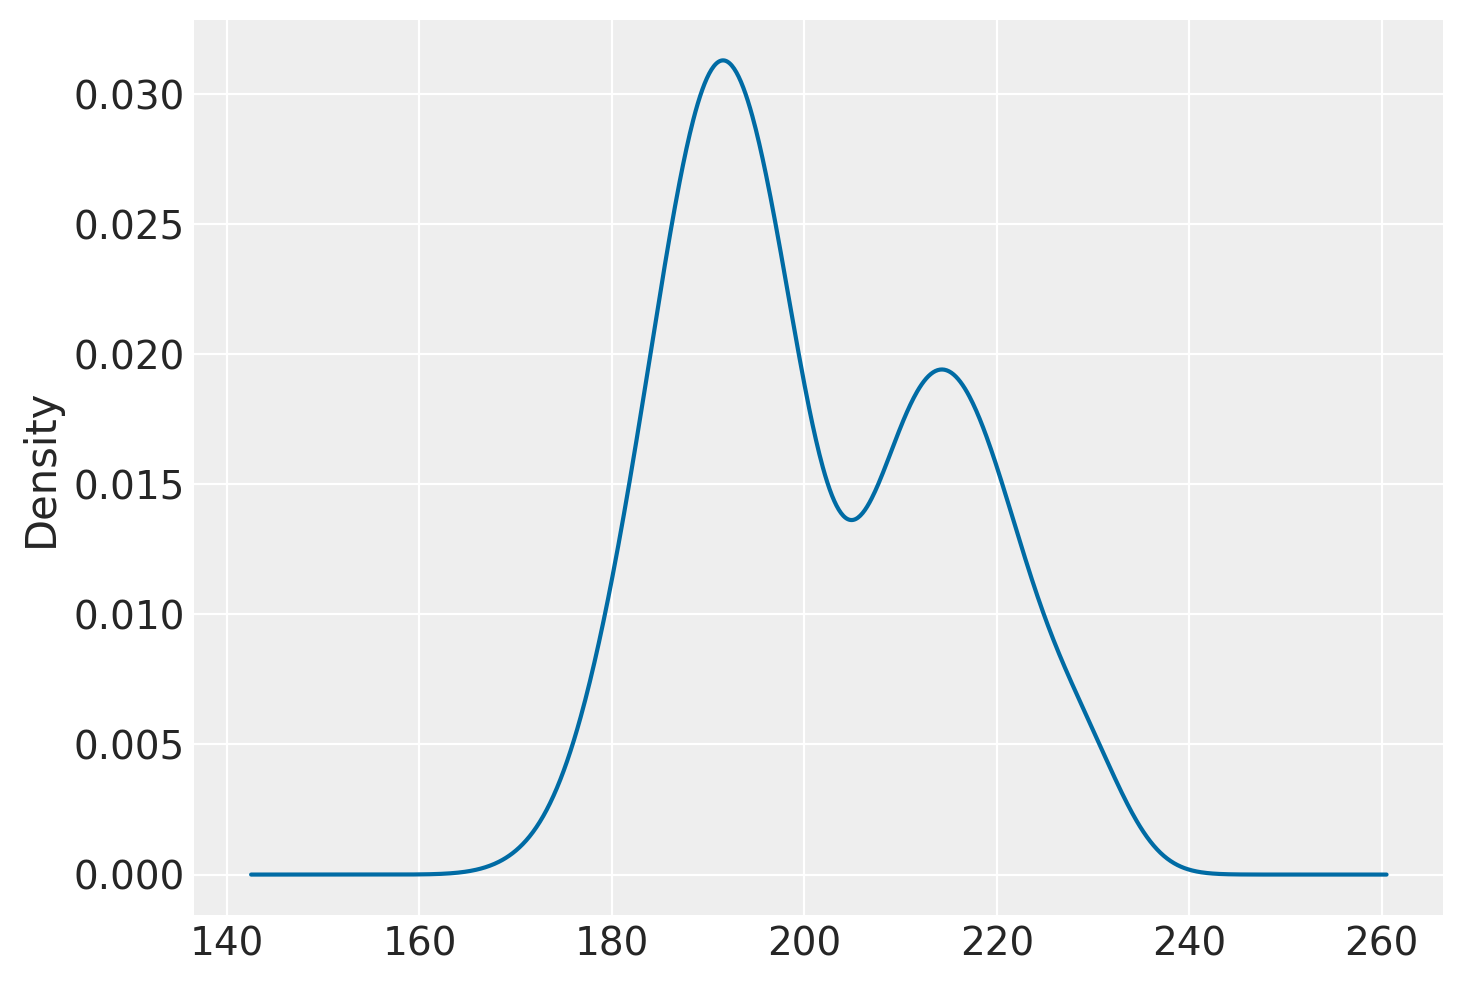

In [10]:
df["flipper_length_mm"].plot.kde(bw_method=0.3)

### Swarmplot

<AxesSubplot: xlabel='island', ylabel='bill_length_mm'>

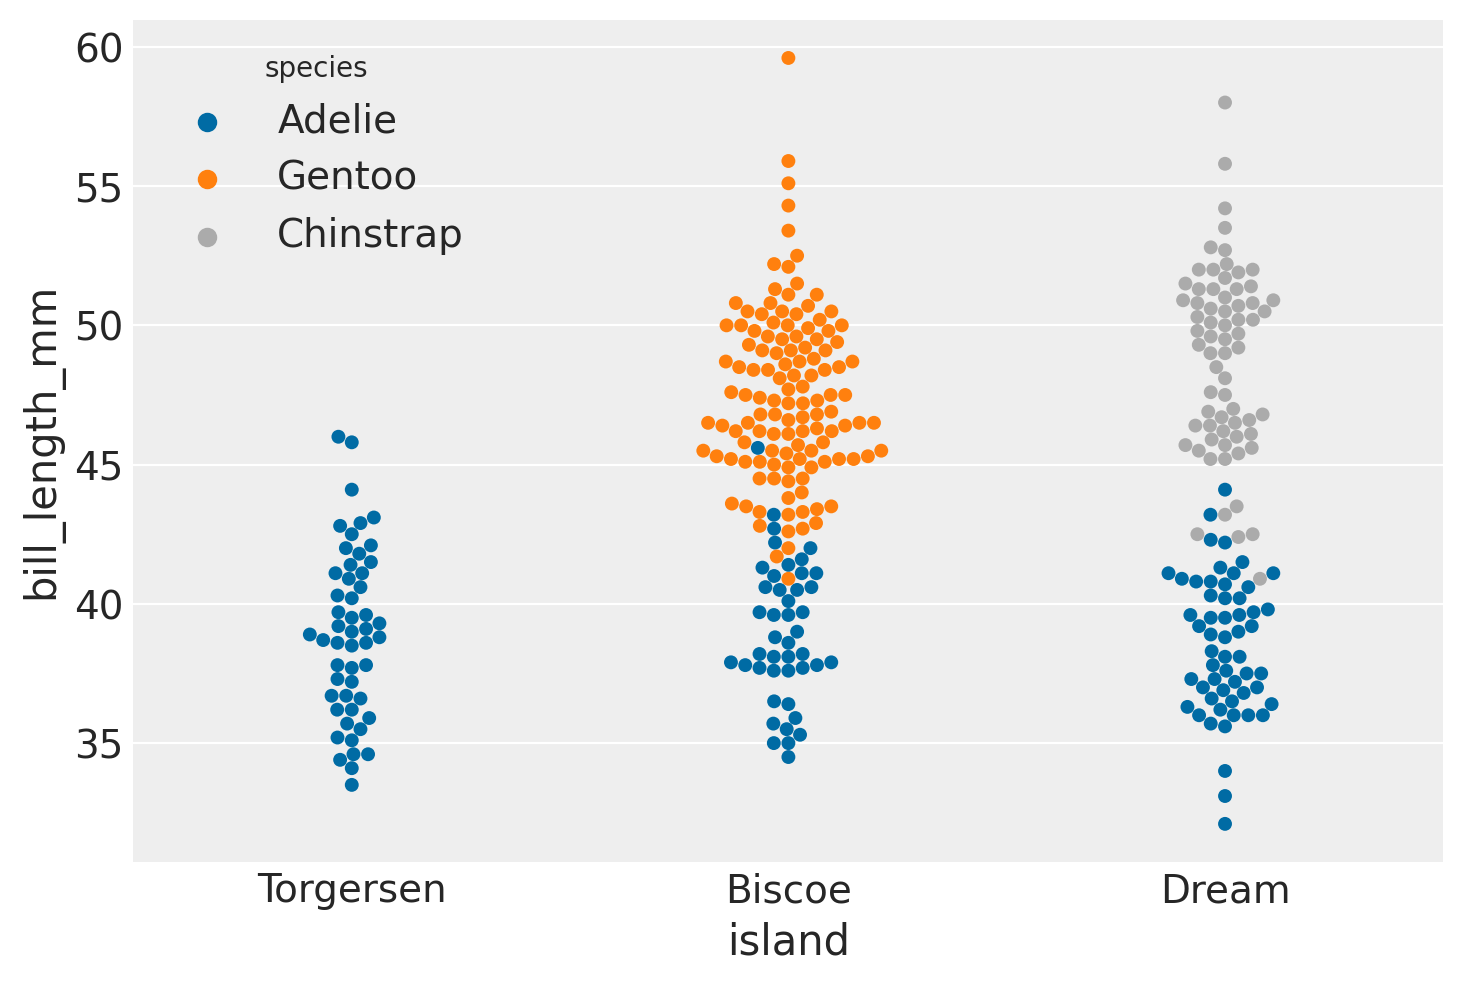

In [8]:
sns.swarmplot(x=df.island,y=df.bill_length_mm,hue=df.species)

Scopriamo che

- Adelie vive in tutte e tre le isole.
- Gentoo vive solo in Biscoe.
- Gentoo e Chinstrap hanno becchi più lunghi rispetto ad Adelie.

### Boxplot

Analizziamo la massa del corpo in funzione della specie, distinguendo le osservazioni in base al genere.

<AxesSubplot: xlabel='species', ylabel='body_mass_g'>

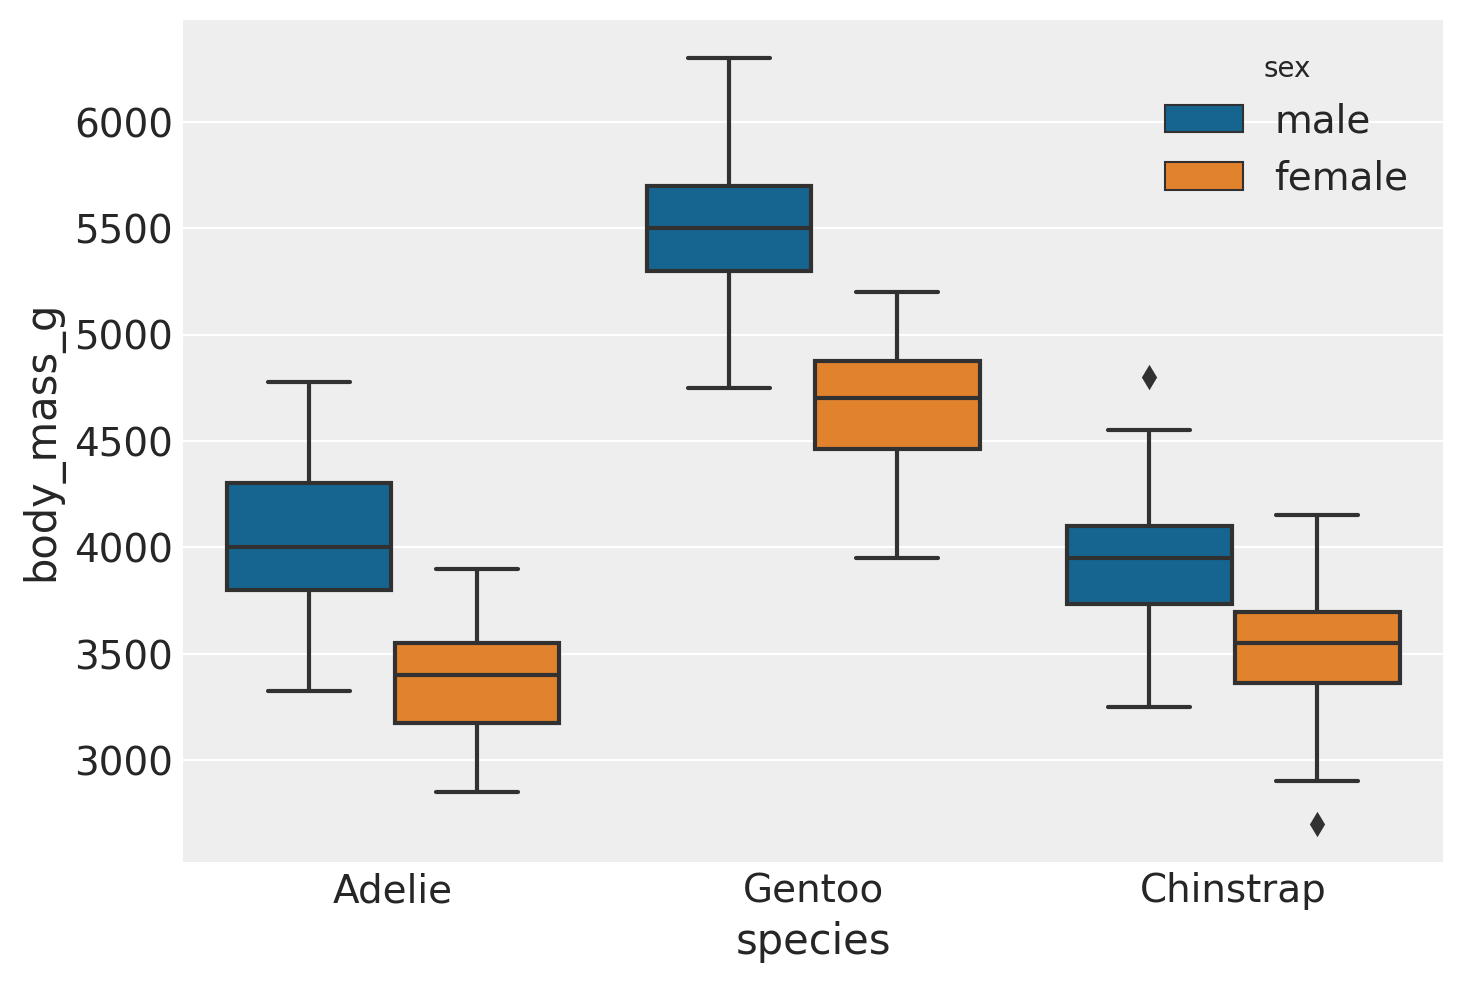

In [9]:
sns.boxplot(x=df.species,y=df.body_mass_g,hue=df.sex)

Dal box-plot è abbastanza evidente che i pinguini maschi pesano più delle femmine in tutte le tre specie, e che i pinguini Gentoo pesano più di Adelie e Chinstrap.

## Relazioni tra variabili

Calcoliamo la correlazione tra le variabili.

In [11]:
correlation_matrix=df.corr().round(2)
correlation_matrix

/var/folders/hl/dt523djx7_q7xjrthzjpdvc40000gn/T/ipykernel_93461/1490986381.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr().round(2)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.00,-0.24,0.66,0.60,0.05
bill_depth_mm,-0.24,1.00,-0.58,-0.47,-0.06
flipper_length_mm,0.66,-0.58,1.00,0.87,0.17
body_mass_g,0.60,-0.47,0.87,1.00,0.04
year,0.05,-0.06,0.17,0.04,1.00


È più semplice leggere queste informazioni usando la rappresentazione seguente.

<AxesSubplot: >

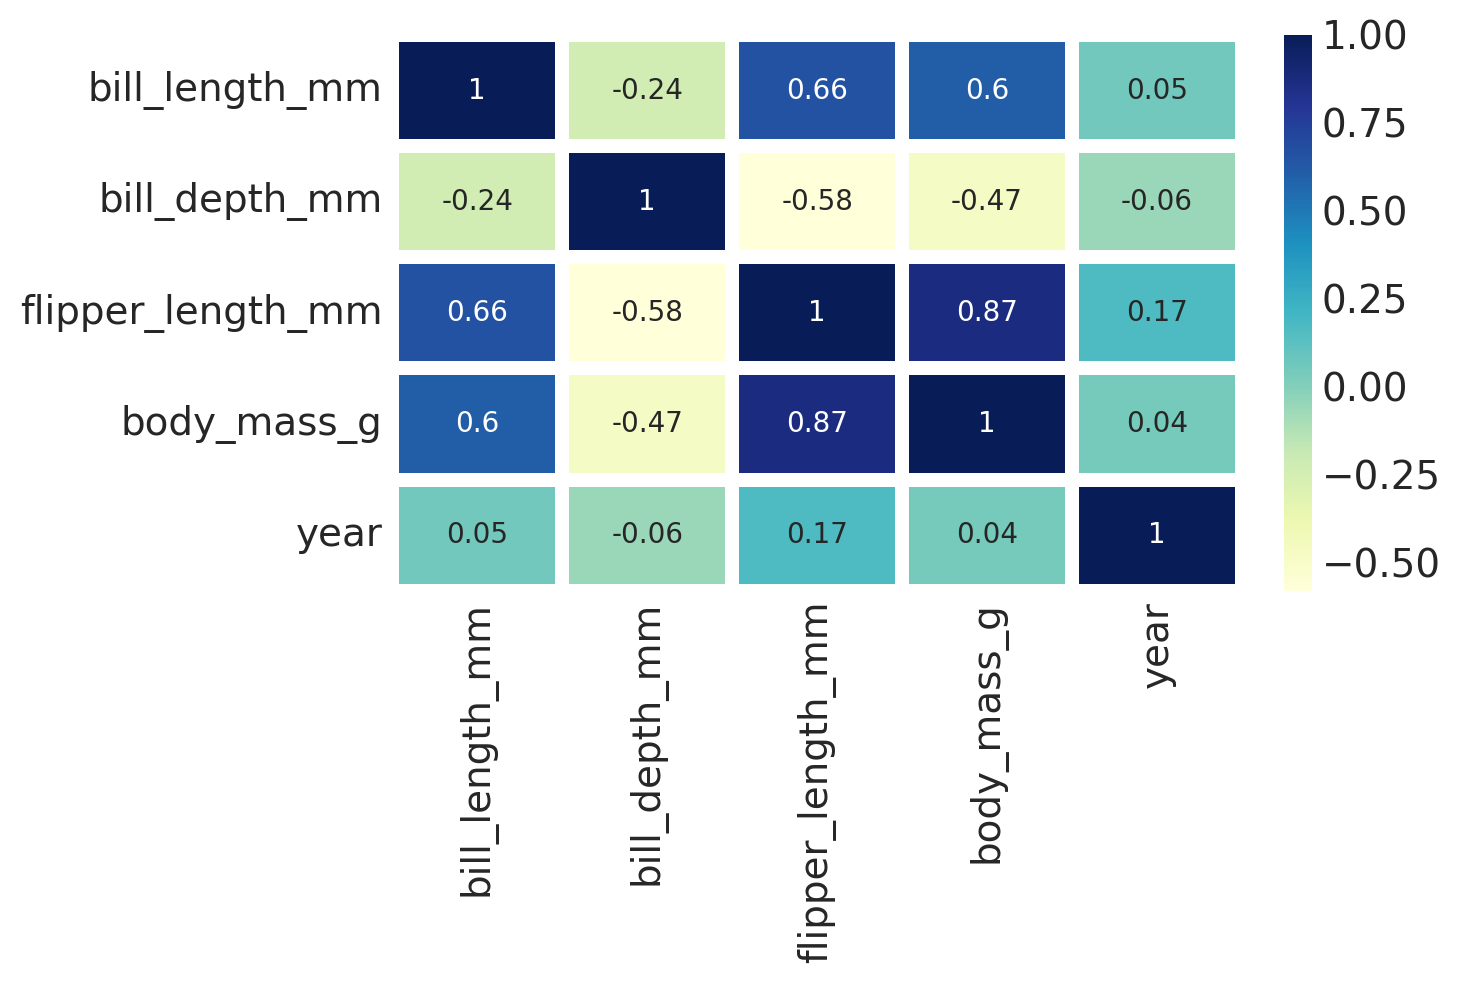

In [12]:
sns.heatmap(correlation_matrix,annot=True,linecolor='white',linewidths=5,cmap="YlGnBu")

La lunghezza della pinna e la massa corporea sono fortemente associati con una correlazione di 0.87. In altre parole, i pinguini con pinne più lunghe generalmente pesano di più.

Vediamo qui sotto un esempio di diagramma a dispersione.

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

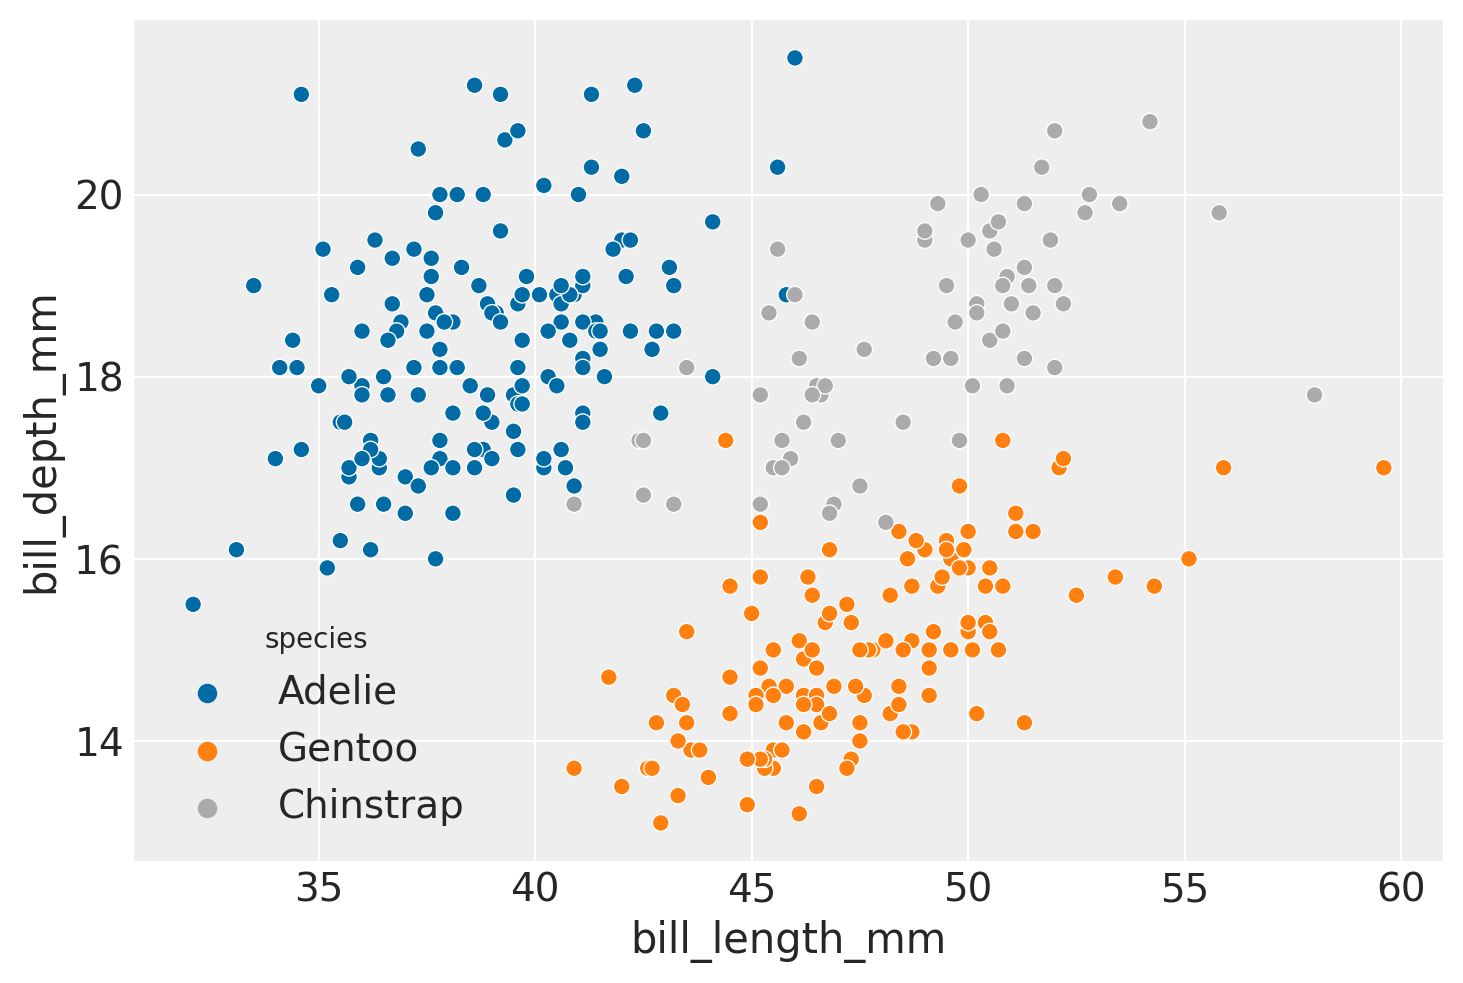

In [13]:
sns.scatterplot(x=df.bill_length_mm,y=df.bill_depth_mm,hue=df.species)

Chiaramente le osservazioni delle tre specie si raggruppano in cluster separati.  
Per ciascuna specie, la lunghezza e la largezza del becco rientrano in un certo intervallo.

## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w